#Import the relevant Python libraries

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Read the '**Day**' dataset

In [371]:
df = pd.read_csv('/content/sample_data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [372]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [373]:
# Verify that all the rows and columns are uploaded as in the csv file.
df.shape

(730, 16)

#Data Cleaning

In [374]:
# Covert the numeric values of season to string names for better comprehension.
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [375]:
# Covert the numeric values of weathersit to string names for better comprehension.
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Heavy Rain'})
df.weathersit.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

The year (yr) and month(month) attributes are already available. Hence extract the 'day' from the `dteday` attribute and discard the dteday attribute.

In [376]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['day'] = df['dteday'].dt.day
df.day
# A new column 'day' is created as expected.

0       1
1       2
2       3
3       4
4       5
       ..
725    27
726    28
727    29
728    30
729    31
Name: day, Length: 730, dtype: int64

####The variables **`instant`**, **`dteday`**, **`casual`** and **`registered`** do not affect the analysis of the dataset. 'instant' is just a serial number and 'dteday' can be used to extract the day for use with the other categorical variables. 'casual' and 'registered' can be removed, prevent data leakage, since they will not be available at the time of booking the vehicle.

In [377]:
drop_columns = df[['instant','dteday','casual','registered']]
df.drop(drop_columns, axis=1, inplace=True)
df.shape # Result (730, 13)

(730, 13)

In [378]:
df.columns
# The above-mentioned 4 columns have been removed successfully.

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [379]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


###Check if any column has null values.

In [380]:
df.info()
# It can be seen that all the columns have non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  day         730 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 74.3+ KB


In [381]:
df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,15.720548
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,8.802278
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,8.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,16.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,23.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,31.000000


###Check for Multicollinearity

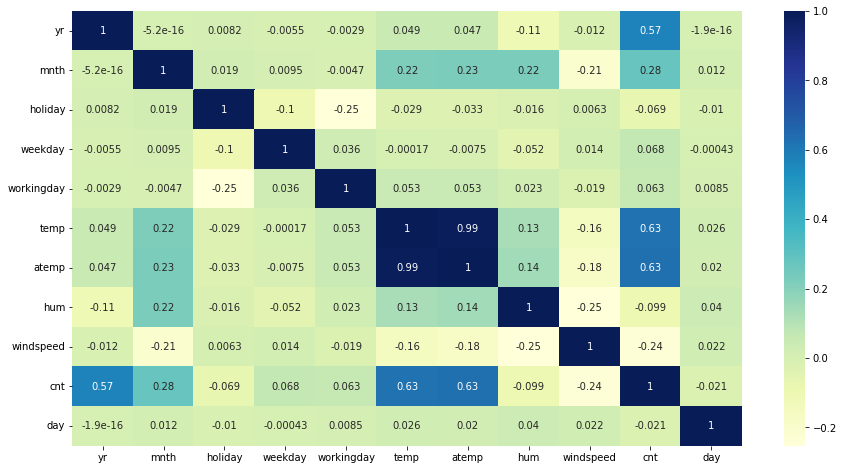

In [382]:
# Visualise the variables
plt.figure(figsize = (15,8))
sbn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Remove the variable 'temp' since it is highly collinear with atemp.

In [383]:
# The heat map shows high correlation between 'temp' and 'atemp' variables.
# Since `atemp` is the feeling temperature, it should be retained and the 'temp'variable can be dropped.
df.drop('temp', axis=1, inplace=True)
# df.drop('mnth', axis=1, inplace=True)

In [384]:
df.shape

(730, 12)

### Mark the dependent and the independent variables 

In [385]:
dependent_var = 'cnt'
independent_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'atemp', 'hum', 'windspeed', 'day']

In [386]:
continuous_vars = ['atemp', 'hum', 'windspeed']
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'day']

#### Visualising Numeric Variables

Make a pairplot of all the numeric variables

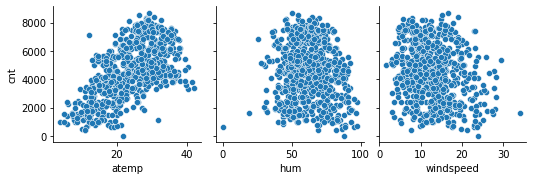

In [387]:
sbn.pairplot(df, x_vars=continuous_vars, y_vars=dependent_var, aspect=1, kind='scatter')
plt.show()

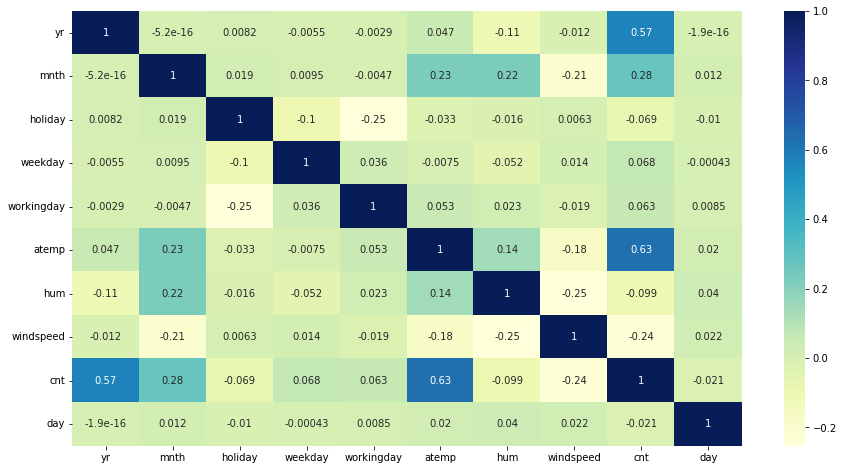

In [388]:
plt.figure(figsize = (15,8))
sbn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
# Season and mnth show a high correlation. Yet let us wait until we do the feature elimination to see if dropping one of them
# will affect the prediction or explainability.

Make a pairplot of all the categorical variables

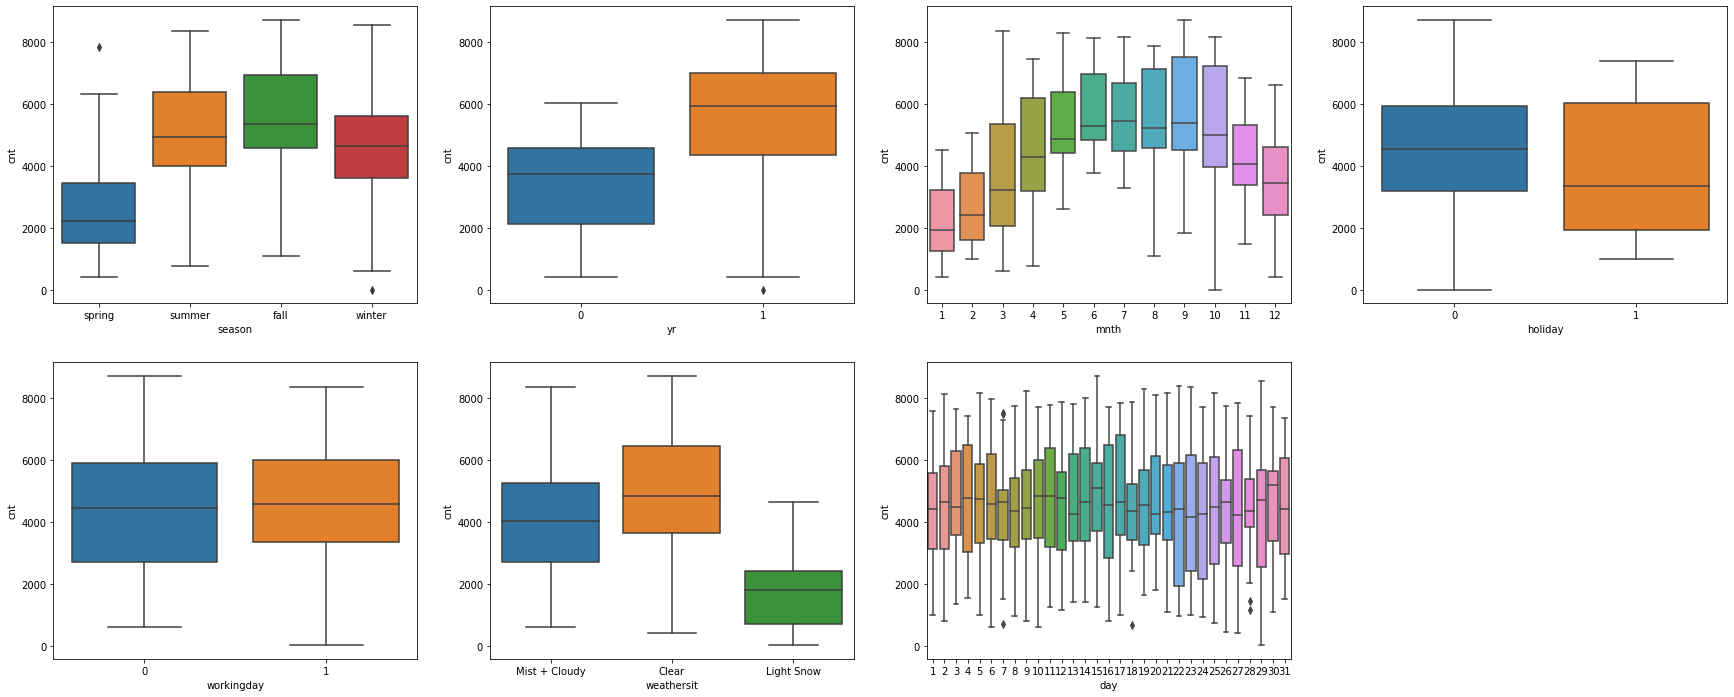

In [389]:
plt.figure(figsize=(30, 12))
plt.subplot(2,4,1)
sbn.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sbn.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sbn.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sbn.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sbn.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sbn.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sbn.boxplot(x = 'day', y = 'cnt', data = df)
plt.show()

### Observations from the above box plots of the categorical variables.

1. The number of users during season 3 (Fall) is more based on the median on the plot.

2. The number of users have increased in current year (2019) compared to previous year (2018). The same trend can be expected in the fututre too.

3. The data for the mnth almost agrees with the data for the season. One of them can be removed.

4. The usage seems to be more during holidays

5. The usage is more, comparatively, on non working days.

6. The average usage is more when the skies are clear.

7. The usage is almost equally distributed on each day of the month.

# Apply One Hot Encoding for all the categorical variables

In [390]:
# Encode season and drop the attribute
enc_cols = pd.get_dummies(df['season'], drop_first=True)
df = pd.concat([df, enc_cols], axis = 1)

df.drop('season', axis=1, inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,spring,summer,winter
0,0,1,0,6,0,Mist + Cloudy,18.18125,80.5833,10.749882,985,1,1,0,0
1,0,1,0,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801,2,1,0,0
2,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349,3,1,0,0
3,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562,4,1,0,0
4,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600,5,1,0,0


In [391]:
# Encode yr and drop the attribute
df = pd.get_dummies(df, prefix='Year', columns=['yr'], drop_first=True)
df.head()

,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,spring,summer,winter,Year_1
0,1,0,6,0,Mist + Cloudy,18.18125,80.5833,10.749882,985,1,1,0,0,0
1,1,0,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801,2,1,0,0,0
2,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349,3,1,0,0,0
3,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562,4,1,0,0,0
4,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600,5,1,0,0,0


In [392]:
# Encode mnth
# df = pd.get_dummies(df, prefix='Month', columns=['mnth'])
# df.head()

In [393]:
# Encode holiday
# df = pd.get_dummies(df, prefix='Holiday', columns=['holiday'])
# df.head()

In [394]:
# Encode weekday
df = pd.get_dummies(df, prefix='Weekday', columns=['weekday'], drop_first=True)
df.head()

,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,day,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,0,0,Mist + Cloudy,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,0,0,1
1,1,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,0,0,0
2,1,0,1,Clear,9.47025,43.7273,16.636703,1349,3,1,0,0,0,1,0,0,0,0,0
3,1,0,1,Clear,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,1,0,0,0,0
4,1,0,1,Clear,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0


In [395]:
# Encode workingday
# df = pd.get_dummies(df, prefix='Workingday', columns=['workingday'])
# df.head()

In [396]:
# Encode weathersit and drop the attribute
enc_cols = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df, enc_cols], axis = 1)

df.drop('weathersit', axis=1, inplace=True)
df.head()

,mnth,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy
0,1,0,0,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,0,0,1,0,1
1,1,0,0,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,9.47025,43.7273,16.636703,1349,3,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,1,0,0,0,0,0,0
4,1,0,1,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,1,0,0,0,0,0


### Convert the day attribute into a bucket of 3 parts
    Day is 1-8 then 'start_of_month'
    Day is 9-23 then 'mid_of_month'
    Day is > 23 then 'end_of_month'

### Create a new attribute named 'part_of_day'

In [397]:
def partofday(val):
  if val <= 8:
    return 'start_of_month'
  elif (val > 8) & (val <24):
    return 'mid_of_month'
  else:
    return 'end_of_month'
df['part_of_day'] = df.day.apply(partofday)
df.head()

,mnth,holiday,workingday,atemp,hum,windspeed,cnt,day,spring,summer,...,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,part_of_day
0,1,0,0,18.18125,80.5833,10.749882,985,1,1,0,...,0,0,0,0,0,0,1,0,1,start_of_month
1,1,0,0,17.68695,69.6087,16.652113,801,2,1,0,...,0,0,0,0,0,0,0,0,1,start_of_month
2,1,0,1,9.47025,43.7273,16.636703,1349,3,1,0,...,0,1,0,0,0,0,0,0,0,start_of_month
3,1,0,1,10.60610,59.0435,10.739832,1562,4,1,0,...,0,0,1,0,0,0,0,0,0,start_of_month
4,1,0,1,11.46350,43.6957,12.522300,1600,5,1,0,...,0,0,0,1,0,0,0,0,0,start_of_month


In [398]:
#Drop the 'day' attibute and encode the part_of_day attribute.
df.drop('day', axis=1, inplace=True)

In [399]:
# Encode part_of_day and drop the attribute
enc_cols = pd.get_dummies(df['part_of_day'], drop_first=True)
df = pd.concat([df, enc_cols], axis = 1)

df.drop('part_of_day', axis=1, inplace=True)
df.head()

,mnth,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
0,1,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [400]:
# Drop the mnth attribute since it is highly collinear with the season attribute.
df.drop('mnth', axis=1, inplace=True)
df.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,1


# Splitting the Data into Training and Testing Sets

In [401]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [402]:
df_train.shape

(510, 20)

In [403]:
df_test.shape

(219, 20)

# Rescaling: Use the MinMax scaling for this data

In [404]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler to only the continuous(numeric) variables including the target variable
scale_vars = ['atemp', 'hum', 'windspeed','cnt']
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
653,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,1,0,0,0,0,0,0,1,0
576,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,1,0,0,0,0,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,1,0,1,0,1
728,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,0,0,0,0,0,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,1,0,1,0,0


In [405]:
df_train.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137,0.494118,0.266667
std,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223,0.500456,0.442651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


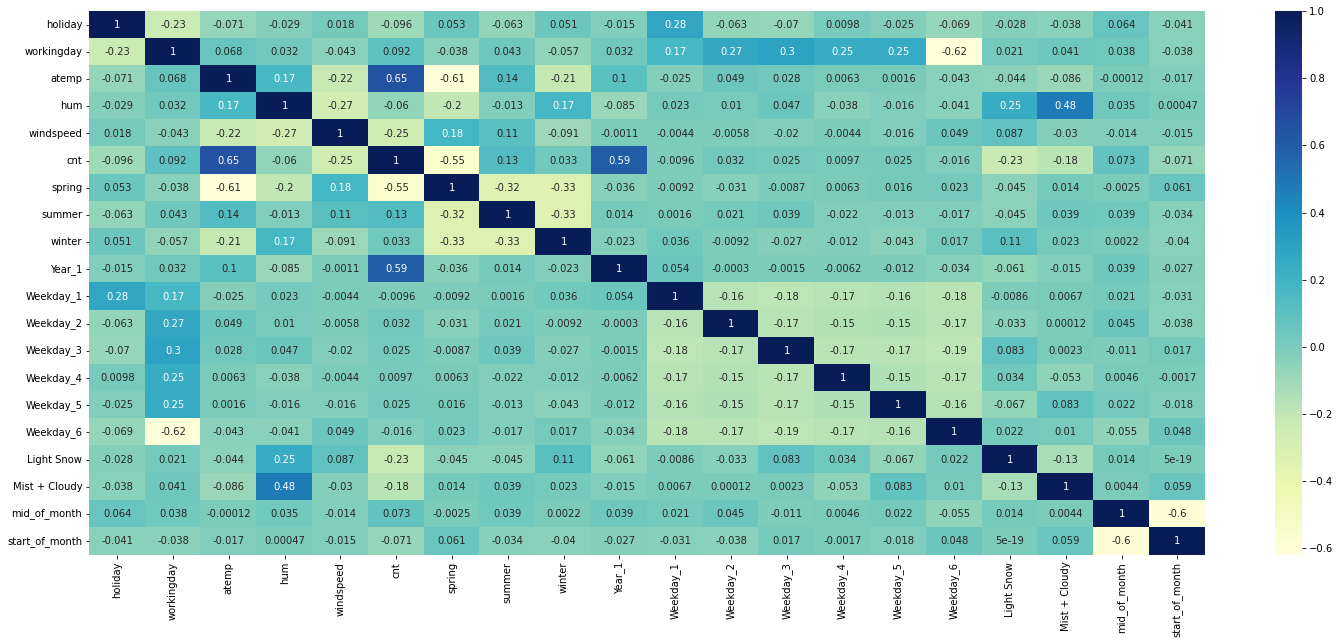

In [406]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sbn.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Build a Linear Model

In [407]:
import statsmodels.api as sm

# Divide X and y train sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

X_train.head()

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
653,0,1,0.501133,0.575354,0.300794,0,0,1,1,0,1,0,0,0,0,0,0,1,0
576,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,1,0,0,0,0,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1,0,1,0,1
728,0,0,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0,0
482,0,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,1,0,1,0,0


Start with a single variable

In [408]:
# Build a linear model starting with 1 variable
X_train_lm = sm.add_constant(X_train['atemp'])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params


const    0.162924
atemp    0.683633
dtype: float64

In [409]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.10e-61
Time:                        17:52:11   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

##Points to note at this juncture, model with 1 variable 'atemp':


*   Coefficient of atemp is high - Good
*   The p-value of both constant and atemp are zero, which means the result is statistically significant.
*   R-Squared is 0.418. Hence 41.8 percent of the variance in the count is explained by the variable atemp.





## Now add the second variable to the model and recalculate

In [410]:
# Build a linear model starting with 2 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.072104
atemp     0.625241
Year_1    0.237817
dtype: float64

In [411]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.07e-131
Time:                        17:52:11   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

##Points to note at this juncture, model with 2 variables 'atemp' and 'Year_1':


*   Coefficient of atemp and Year_1 are positive
*   The p-value of both constant, atemp and Year_1 are zero, which means the result is statistically significant.
*   R-Squared has increased to 0.696. Hence 69.6 percent of the variance in the count is explained by the variables atemp and Year_1.
*   Note that the Adjusted R-squared has also increased indicating that the model can be accepted.

Now add the third variable to the model and recalculate

In [412]:
# Build a linear model starting with 3 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.183334
atemp     0.648110
Year_1    0.232240
hum      -0.184710
dtype: float64

In [413]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     411.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.27e-135
Time:                        17:52:11   Log-Likelihood:                 353.73
No. Observations:                 510   AIC:                            -699.5
Df Residuals:                     506   BIC:                            -682.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1833      0.027      6.792      0.0

##Points to note at this juncture, model with 3 variables 'atemp', 'Year_1' and 'spring':


*   Coefficient of atemp and Year_1 are positive and for spring it is negative, which is fine since this variable is inversely correlated with the count.
*   The p-value of both constant, atemp, Year_1 and spring are zero, which means the result is still statistically significant.
*   R-Squared has increased to 0.741. Hence 74.1 percent of the variance in the count is explained by the variables atemp, Year_1 and spring.
*   Note that the Adjusted R-squared has also increased indicating that the model can be accepted.

In [414]:
# Build a linear model starting with 4 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'spring', 'hum']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.342337
atemp     0.464368
Year_1    0.234517
spring   -0.152528
hum      -0.229017
dtype: float64

In [415]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     404.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.78e-156
Time:                        17:52:11   Log-Likelihood:                 404.52
No. Observations:                 510   AIC:                            -799.0
Df Residuals:                     505   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3423      0.029     11.916      0.0

In [416]:
# Build a linear model starting with 5 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'spring', 'hum', 'summer']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.352216
atemp     0.461190
Year_1    0.234556
spring   -0.159228
hum      -0.232848
summer   -0.016923
dtype: float64

In [417]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     324.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.22e-155
Time:                        17:52:11   Log-Likelihood:                 405.51
No. Observations:                 510   AIC:                            -799.0
Df Residuals:                     504   BIC:                            -773.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3522      0.030     11.920      0.0

In [418]:
# Build a linear model starting with 4 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'summer']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.179479
atemp     0.641592
Year_1    0.232322
hum      -0.182199
summer    0.022539
dtype: float64

In [419]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.02e-134
Time:                        17:52:11   Log-Likelihood:                 355.34
No. Observations:                 510   AIC:                            -700.7
Df Residuals:                     505   BIC:                            -679.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1795      0.027      6.643      0.0

In [420]:
# Build a linear model starting with 4 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'spring']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const     0.342337
atemp     0.464368
Year_1    0.234517
hum      -0.229017
spring   -0.152528
dtype: float64

In [421]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     404.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.78e-156
Time:                        17:52:12   Log-Likelihood:                 404.52
No. Observations:                 510   AIC:                            -799.0
Df Residuals:                     505   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3423      0.029     11.916      0.0

In [422]:
# Build a linear model starting with 5 variables
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'spring','workingday']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const         0.332110
atemp         0.461596
Year_1        0.234028
hum          -0.230539
spring       -0.152699
workingday    0.019112
dtype: float64

In [423]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     325.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.12e-155
Time:                        17:52:12   Log-Likelihood:                 406.21
No. Observations:                 510   AIC:                            -800.4
Df Residuals:                     504   BIC:                            -775.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3321      0.029     11.374      0.0

In [424]:
# Build a linear model starting with 5 variables
# Remove the 'workingday' variable since it p-value is high and the adjusted r-squared cahnge was insignificant
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'spring','holiday']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const      0.346285
atemp      0.461532
Year_1     0.234313
hum       -0.230243
spring    -0.152190
holiday   -0.065686
dtype: float64

In [425]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     326.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.76e-155
Time:                        17:52:12   Log-Likelihood:                 406.79
No. Observations:                 510   AIC:                            -801.6
Df Residuals:                     504   BIC:                            -776.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3463      0.029     12.070      0.0

In [426]:
# Build a linear model starting with 5 variables
# Remove the 'holiday' variable since it p-value is high and the adjusted r-squared cahnge was insignificant
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'spring','mid_of_month']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const           0.332251
atemp           0.465051
Year_1          0.233394
hum            -0.232551
spring         -0.152537
mid_of_month    0.025512
dtype: float64

In [427]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     328.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.41e-156
Time:                        17:52:12   Log-Likelihood:                 407.99
No. Observations:                 510   AIC:                            -804.0
Df Residuals:                     504   BIC:                            -778.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3323      0.029     11.529   

In [428]:
# Build a linear model starting with 7 variables
# Remove the 'holiday' variable since it p-value is high and the adjusted r-squared cahnge was insignificant
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1', 'hum', 'spring','mid_of_month','Light Snow',	'Mist + Cloudy']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const            0.267446
atemp            0.411916
Year_1           0.233757
hum             -0.040623
spring          -0.159159
mid_of_month     0.025070
Light Snow      -0.270292
Mist + Cloudy   -0.067514
dtype: float64

In [429]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.41e-173
Time:                        17:52:12   Log-Likelihood:                 453.77
No. Observations:                 510   AIC:                            -891.5
Df Residuals:                     502   BIC:                            -857.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2674      0.028      9.705

In [430]:
# Build a linear model starting with 6 variables
# Remove the 'hum' variable since it p-value is high
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1',  'spring','mid_of_month','Light Snow',	'Mist + Cloudy']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const            0.245729
atemp            0.406701
Year_1           0.234719
spring          -0.158007
mid_of_month     0.024702
Light Snow      -0.281214
Mist + Cloudy   -0.074199
dtype: float64

In [431]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     342.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.81e-174
Time:                        17:52:12   Log-Likelihood:                 453.22
No. Observations:                 510   AIC:                            -892.4
Df Residuals:                     503   BIC:                            -862.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2457      0.018     13.632

In [432]:
# Build a linear model starting with 7 variables
# Remove the 'hum' variable since it p-value is high
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1',  'spring','mid_of_month','Light Snow',	'Mist + Cloudy', 'winter']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const            0.195316
atemp            0.467686
Year_1           0.233839
spring          -0.124676
mid_of_month     0.024747
Light Snow      -0.287388
Mist + Cloudy   -0.073530
winter           0.045786
dtype: float64

In [433]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     302.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.82e-175
Time:                        17:52:12   Log-Likelihood:                 459.57
No. Observations:                 510   AIC:                            -903.1
Df Residuals:                     502   BIC:                            -869.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1953      0.023      8.579

In [434]:
# Build a linear model starting with 8 variables
# Remove the 'hum' variable since it p-value is high
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1',  'spring','mid_of_month','Light Snow',	'Mist + Cloudy', 'windspeed']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const            0.300054
atemp            0.387815
Year_1           0.235890
spring          -0.153244
mid_of_month     0.023942
Light Snow      -0.269678
Mist + Cloudy   -0.075995
windspeed       -0.142583
dtype: float64

In [435]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.60e-179
Time:                        17:52:12   Log-Likelihood:                 467.80
No. Observations:                 510   AIC:                            -919.6
Df Residuals:                     502   BIC:                            -885.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3001      0.020     14.866

In [436]:
# Build a linear model starting with 9 variables
# Remove the 'hum' variable since it p-value is high
X_train_lm = sm.add_constant(X_train[['atemp', 'Year_1',  'spring','mid_of_month','Light Snow',	'Mist + Cloudy', 'windspeed','Weekday_6']])
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const            0.295671
atemp            0.389195
Year_1           0.236362
spring          -0.153124
mid_of_month     0.024866
Light Snow      -0.270540
Mist + Cloudy   -0.076188
windspeed       -0.144695
Weekday_6        0.024000
dtype: float64

In [437]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.38e-178
Time:                        17:52:12   Log-Likelihood:                 469.85
No. Observations:                 510   AIC:                            -921.7
Df Residuals:                     501   BIC:                            -883.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2957      0.020     14.608

# Summary of building a model by adding them one-by-one and evaluating the model.

1.   The variance in the count can be explained well by using the three variables atemp, Year_1 and spring 
2.   74.1 percent of the variance can be explained by this model.
3.   On adding the third variable, the change in R-squared was minimal. Hence adding more variables might not provide a significant increase in the explainability.
4.   Hence we can stop at this point and accept the model. 



In [438]:
# Prediction using the Model-8
y_train_pred = lr_model.predict(X_train_lm)

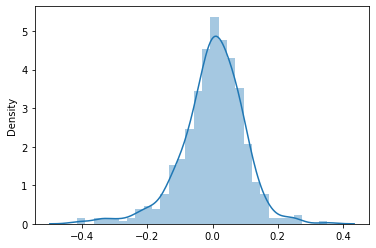

In [439]:
residue = y_train - y_train_pred
sbn.distplot(residue)

# Try to arrive at a model by adding all the variables at once and then eliminate the features gradually.

In [440]:
# Build a linear model starting with all variables
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const             0.251375
holiday          -0.040379
workingday        0.045189
atemp             0.490390
hum              -0.126573
windspeed        -0.159983
spring           -0.097922
summer            0.025840
winter            0.068709
Year_1            0.232062
Weekday_1        -0.012392
Weekday_2        -0.009111
Weekday_3         0.009851
Weekday_4         0.001942
Weekday_5         0.014521
Weekday_6         0.057569
Light Snow       -0.248878
Mist + Cloudy    -0.059548
mid_of_month      0.028707
start_of_month    0.005009
dtype: float64

In [441]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.37e-178
Time:                        17:52:12   Log-Likelihood:                 496.70
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     491   BIC:                            -874.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2514      0.037      6.

In [442]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [443]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
1,workingday,inf
13,Weekday_5,inf
12,Weekday_4,inf
11,Weekday_3,inf
10,Weekday_2,inf
9,Weekday_1,inf
3,hum,27.60
2,atemp,15.69
4,windspeed,4.58


In [444]:
# Dropping highly insignificant variable first

X = X_train.drop('Weekday_4', axis=1)

In [445]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [446]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.37e-178
Time:                        17:52:12   Log-Likelihood:                 496.70
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     491   BIC:                            -874.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2514      0.037      6.

In [447]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.60
2,atemp,15.69
1,workingday,9.29
4,windspeed,4.58
5,spring,3.84
16,mid_of_month,3.04
7,winter,2.96
15,Mist + Cloudy,2.29
6,summer,2.24
9,Weekday_1,2.22


In [448]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Weekday_1', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.91e-179
Time:                        17:52:13   Log-Likelihood:                 496.27
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     492   BIC:                            -880.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2523      0.037      6.

In [449]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.57
2,atemp,15.67
1,workingday,6.81
4,windspeed,4.58
5,spring,3.84
15,mid_of_month,3.04
7,winter,2.96
14,Mist + Cloudy,2.29
6,summer,2.24
16,start_of_month,2.09


In [450]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Weekday_3', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.46e-180
Time:                        17:52:13   Log-Likelihood:                 495.59
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     493   BIC:                            -885.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2511      0.037      6.

In [451]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.57
2,atemp,15.67
1,workingday,5.89
4,windspeed,4.58
5,spring,3.83
14,mid_of_month,3.04
7,winter,2.96
13,Mist + Cloudy,2.29
6,summer,2.23
15,start_of_month,2.09


In [452]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Weekday_2', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.43e-181
Time:                        17:52:13   Log-Likelihood:                 495.31
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     494   BIC:                            -890.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2517      0.037      6.

In [453]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.57
2,atemp,15.66
1,workingday,5.51
4,windspeed,4.58
5,spring,3.83
13,mid_of_month,3.04
7,winter,2.96
12,Mist + Cloudy,2.29
6,summer,2.23
14,start_of_month,2.09


In [454]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('start_of_month', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.64e-182
Time:                        17:52:13   Log-Likelihood:                 495.20
No. Observations:                 510   AIC:                            -960.4
Df Residuals:                     495   BIC:                            -896.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2546      0.037      6.959

In [455]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.38
2,atemp,15.34
1,workingday,5.51
4,windspeed,4.58
5,spring,3.71
7,winter,2.94
12,Mist + Cloudy,2.29
6,summer,2.22
8,Year_1,2.08
13,mid_of_month,2.00


In [456]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Weekday_5', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.88e-183
Time:                        17:52:13   Log-Likelihood:                 494.35
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     496   BIC:                            -901.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2569      0.037      7.025

In [457]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.36
2,atemp,15.34
1,workingday,5.26
4,windspeed,4.58
5,spring,3.71
7,winter,2.94
11,Mist + Cloudy,2.27
6,summer,2.22
8,Year_1,2.08
12,mid_of_month,1.99


In [458]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('summer', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.44e-183
Time:                        17:52:13   Log-Likelihood:                 492.49
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     497   BIC:                            -903.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2827      0.034      8.302

In [459]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.44
2,atemp,13.67
1,workingday,5.18
4,windspeed,4.03
5,spring,2.55
10,Mist + Cloudy,2.24
7,Year_1,2.06
6,winter,2.04
11,mid_of_month,1.98
8,Weekday_6,1.94


In [460]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('holiday', axis=1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     221.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.66e-184
Time:                        17:52:13   Log-Likelihood:                 490.88
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     498   BIC:                            -906.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2752      0.034      8.128

In [461]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,23.27
1,atemp,13.62
0,workingday,4.63
3,windspeed,4.01
4,spring,2.52
9,Mist + Cloudy,2.23
6,Year_1,2.06
5,winter,2.03
10,mid_of_month,1.97
7,Weekday_6,1.82


# The summary of the training Model 11

R-squared:                       0.830
Adj. R-squared:                  0.827

The p-value of the remaining variables are significant
Although the VIF of hum and atemp variables are more, they are the main variables for prediction.

***So the model has the explainability of 83%.***

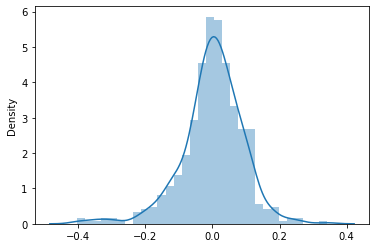

In [462]:
# Prediction using the Model-11
y_train_pred = lr_2.predict(X_train_lm)
residue = y_train - y_train_pred
sbn.distplot(residue)

# Predictions and Evaluation on the Test set

In [463]:
# Apply scaler to only the continuous(numeric) variables including the target variable
scale_vars = ['atemp', 'hum', 'windspeed','cnt']
df_test[scale_vars] = scaler.transform(df_test[scale_vars])
df_test.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
184,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,1
535,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,1,0,0,0,0,0,1,0
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,1,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,1,0,0,0,0,0,1,0
152,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [464]:
df_test.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.027397,0.319635,0.493151,0.251142
std,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.163612,0.467403,0.501098,0.434663
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [465]:
# Prepare the y and the X variable sets.
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
184,1,0,0.769660,0.657364,0.084219,0,0,0,0,1,0,0,0,0,0,0,1,0,1
535,0,1,0.842587,0.610133,0.153728,0,1,0,1,0,0,1,0,0,0,0,0,1,0
299,0,1,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,1,0,0,0,1,0,0
221,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,0,1,0,0,0,0,0,1,0
152,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [466]:
# Add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Year_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Light Snow,Mist + Cloudy,mid_of_month,start_of_month
184,1.0,1,0,0.769660,0.657364,0.084219,0,0,0,0,1,0,0,0,0,0,0,1,0,1
535,1.0,0,1,0.842587,0.610133,0.153728,0,1,0,1,0,0,1,0,0,0,0,0,1,0
299,1.0,0,1,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,1,0,0,0,1,0,0
221,1.0,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,0,1,0,0,0,0,0,1,0
152,1.0,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,1


### Remove the columns that were removed during the training of the model

In [467]:
X_test_sm = X_test_sm.drop(['Weekday_4', 'Weekday_1', 'Weekday_3','Weekday_2', 'start_of_month', 'Weekday_5', 'summer', 'holiday'], axis=1)

### Predict the Test set

In [468]:
y_test_pred = lr_2.predict(X_test_sm)

### Evaluate the r-squared score on the test set.

In [469]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8077746065679671

# The test set has provided an R-Squared score of 80.77% which is close to the 83% that the training model provided. Hence we can conclude that the model can be accepted.